In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib.patches as mpatches

Step 2a: Mean center V, U and compute SVD 

In [2]:
U, V = np.load('method1_U.npy'), np.load('method1_V.npy')

V_offsets = np.array([
    np.average(row) 
    for row in V
])

V_mc = np.array([
    row - V_offsets[i]
    for i, row in enumerate(V)
])

U_mc = np.array([
    row - V_offsets[i]
    for i, row in enumerate(U)
])

V_mc.shape, U_mc.shape

((20, 1682), (20, 943))

In [13]:
V_A, V_E, V_B = np.linalg.svd(V_mc)
V_A.shape, V_E.shape, V_B.shape

((20, 20), (20,), (1682, 1682))

In [14]:
V_A12 = V_A[:,:2]
V_A12.shape

(20, 2)

In [15]:
V_A12.T.shape, V_mc.shape

((2, 20), (20, 1682))

In [16]:
V_A12.T.shape, U_mc.shape

((2, 20), (20, 943))

Step 2b: project every movie & user using A1:2

In [19]:
V_proj = V_A12.T @ V_mc
U_proj = V_A12.T @ U_mc
V_proj.shape, U_proj.shape

((2, 1682), (2, 943))

Step 2c: Normalize U,V to have unit variance

In [22]:
U_pn = np.array([
    row / np.var(row)
    for row in U_proj
])

V_pn = np.array([
    row / np.var(row)
    for row in V_proj
])

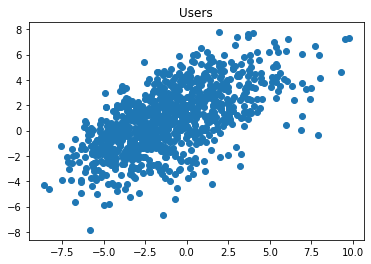

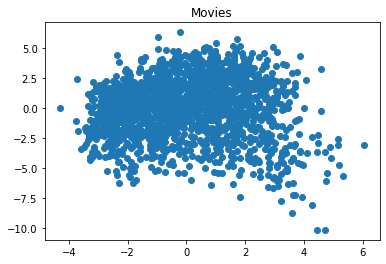

In [26]:
plt.scatter(U_pn[0], U_pn[1])
plt.title("Users")
plt.show()
plt.scatter(V_pn[0], V_pn[1])
plt.title("Movies")
plt.show()

U is users, V is movies. Investigate V: for each genre, color differently. 

In [27]:
data, test, train, movies = pd.read_csv("data/data.csv"), pd.read_csv("data/test.csv"), pd.read_csv("data/train.csv"), pd.read_csv("data/movies.csv")



In [34]:
genres = list(movies.columns[3:])
genres

['Action',
 'Adventure',
 'Animation',
 'Childrens',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [35]:
V_pn.shape

(2, 1682)

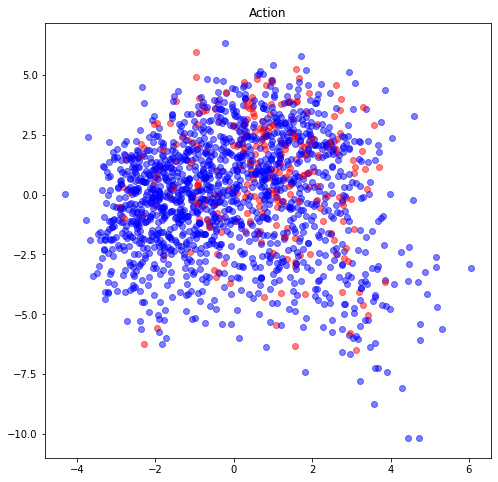

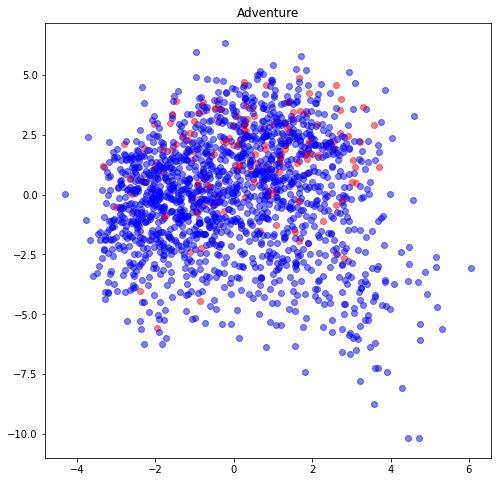

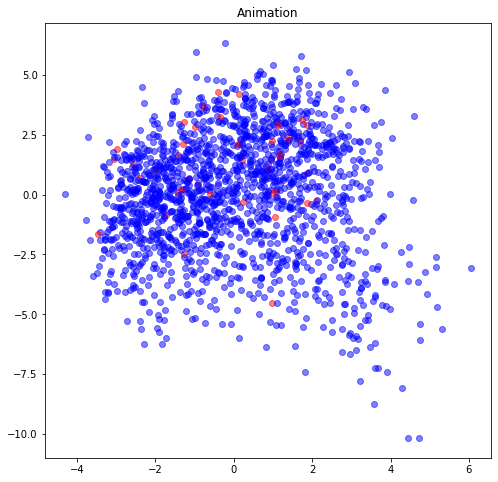

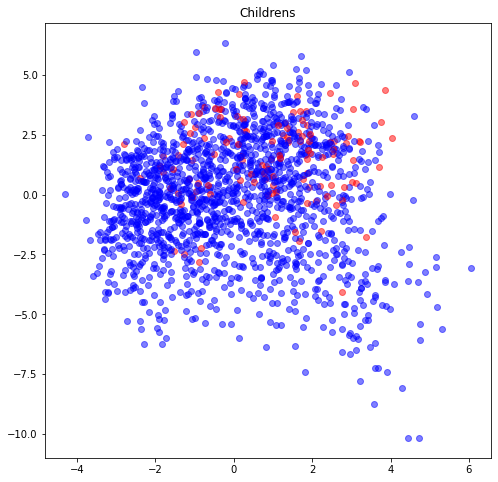

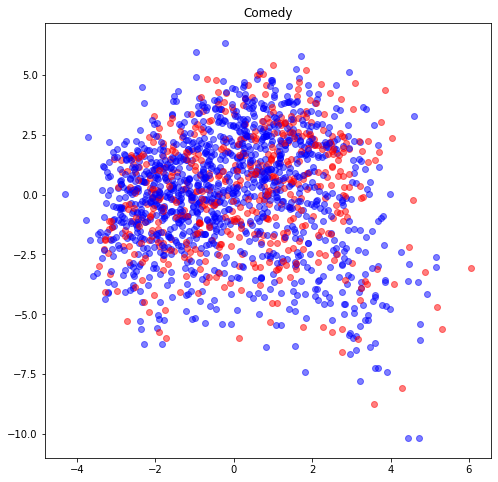

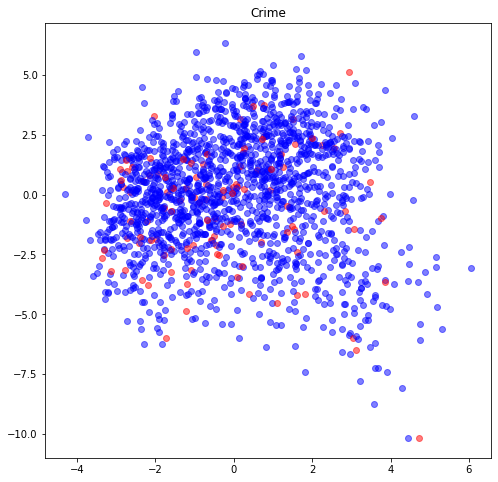

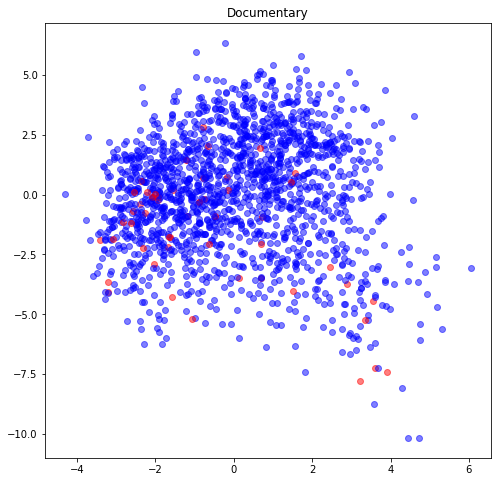

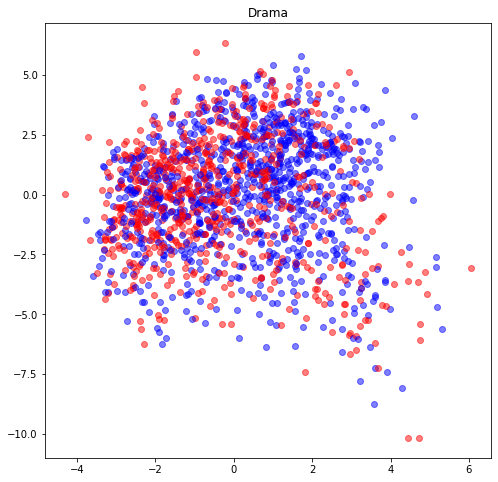

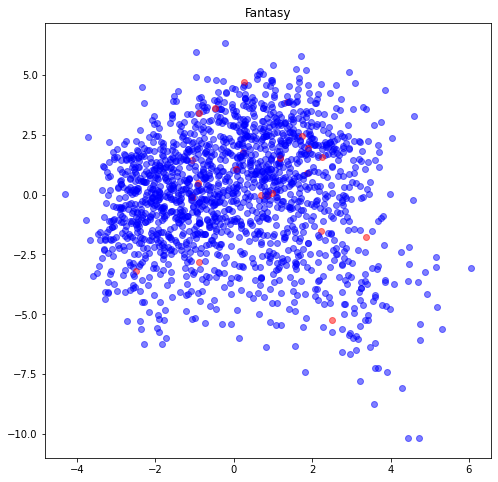

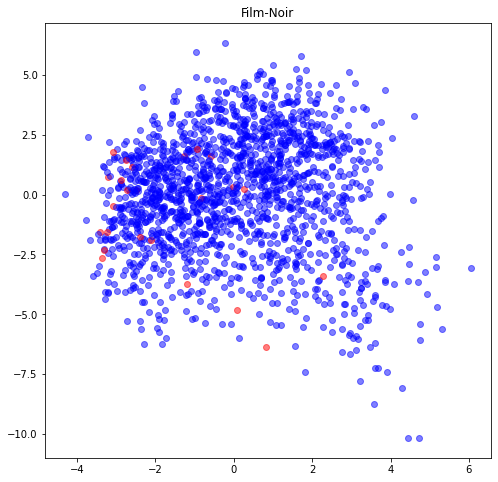

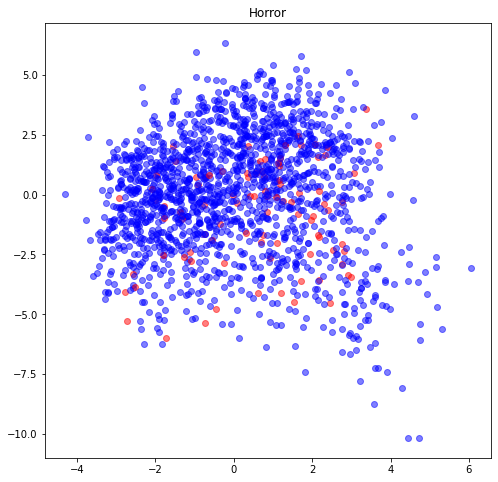

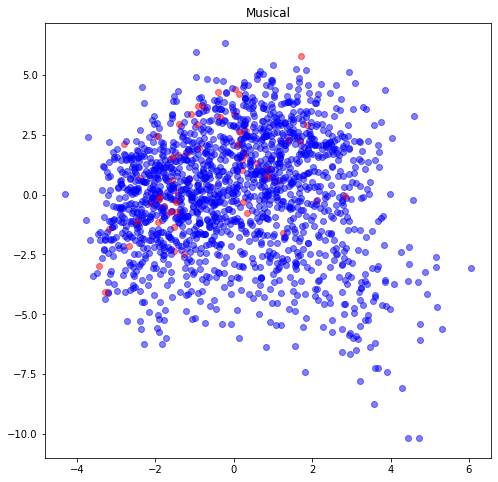

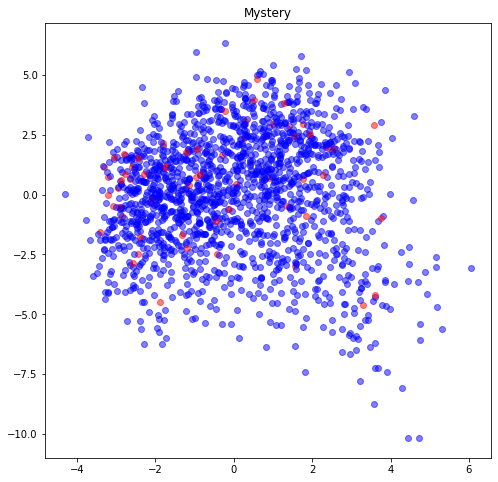

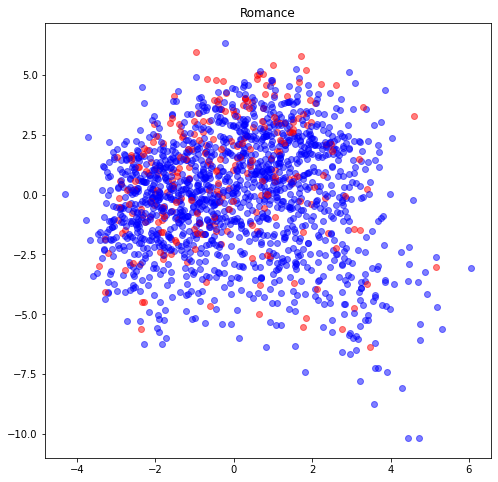

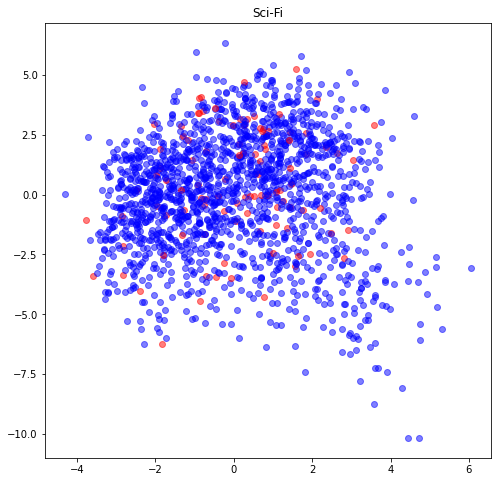

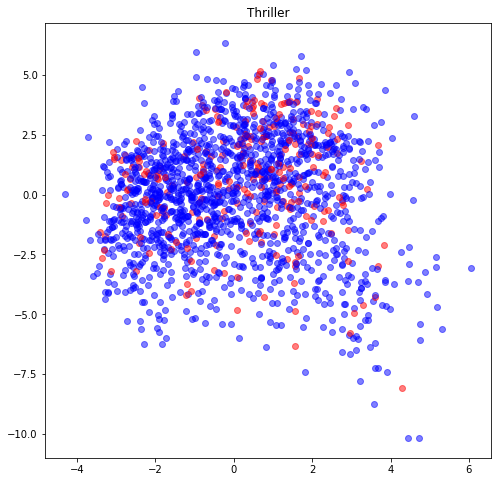

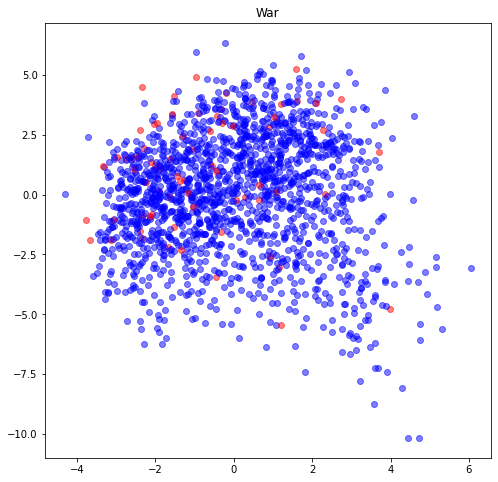

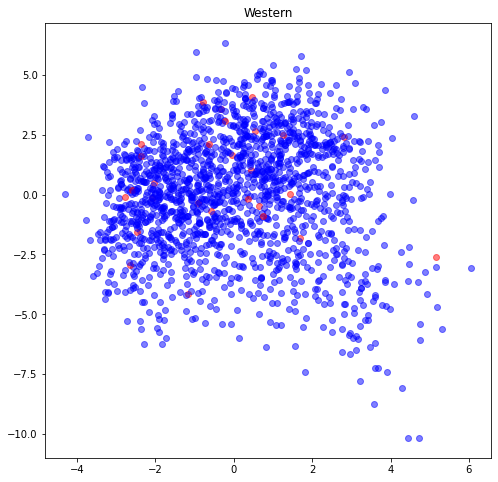

In [94]:
for genre in genres:
    ids_in_genre = movies[movies[genre] == 1]["Movie ID"]
    idx_in_genre = np.array(ids_in_genre) - 1
    plt.figure(figsize=(8,8))
    for idx in range(V_pn.shape[1]):
        color = 'r' if idx in idx_in_genre else 'b'
        plt.scatter(V_pn[0][idx], V_pn[1][idx], c=color, alpha=0.5)
    plt.title(genre)
    plt.show()

In [63]:
starwars_ids = [50, 172, 181]
starwars_idx = np.array(starwars_ids) - 1

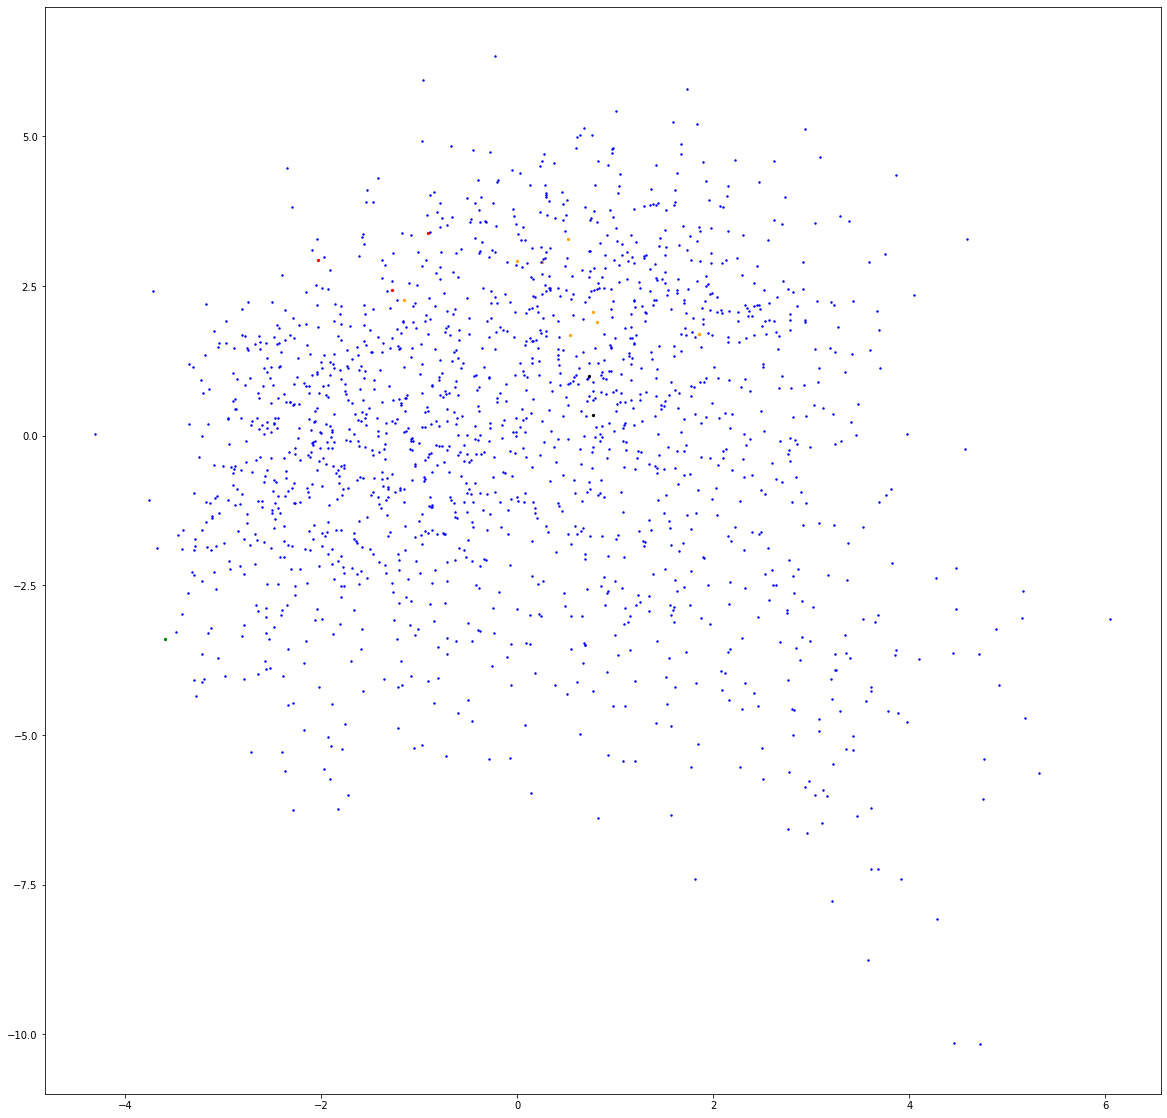

In [92]:
idx_in_genre = starwars_idx
plt.figure(figsize=(20,20))
for idx in range(V_pn.shape[1]):
    color = 'r' if idx in idx_in_genre else 'b' # Star wars
    if idx == 178:
        color = 'g'
    if idx in [221, 226, 227, 228, 229, 379, 448, 449]: #Star trek
        color = 'orange'
    if idx in [40, 762]: #Adam sandler: Billy madison
        color = 'black'
    plt.scatter(V_pn[0][idx], V_pn[1][idx], c=color, s=2 if color=='b' else 10)
plt.show()

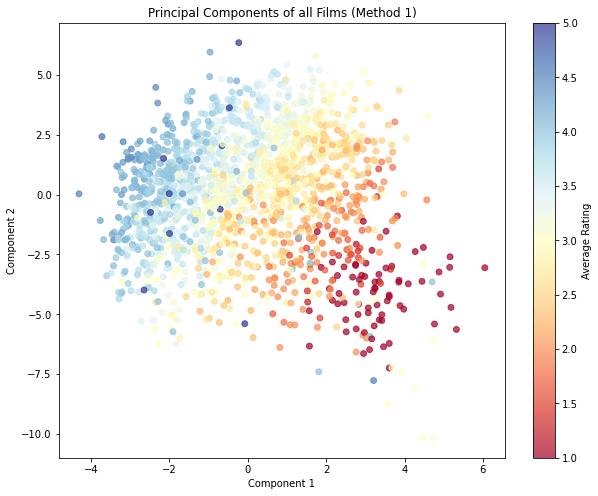

In [125]:
ratings = data[["Movie ID", "Rating"]].groupby("Movie ID").mean()
plt.figure(figsize=(10,8))
cm = plt.cm.get_cmap('RdYlBu')
r_arr = ratings["Rating"].array
sc = plt.scatter(V_pn[0], V_pn[1], c=r_arr, vmin=min(r_arr), vmax=max(r_arr), s=35, cmap=cm, alpha=0.7)
cbar = plt.colorbar(sc)
cbar.set_label("Average Rating")
plt.title("Principal Components of all Films (Method 1)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


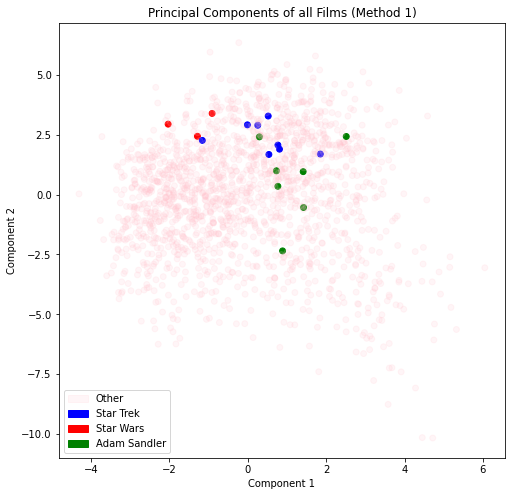

In [208]:
star_trek_idx = np.array([222, 227, 228, 229, 230, 380, 449, 450]) - 1
star_wars_idx = np.array([50, 172, 181]) - 1
sandler_idx = np.array([41, 354, 577, 940, 763, 1209, 833]) - 1
n_movies = V_pn.shape[1]
c = np.zeros(n_movies)
for v, arr in enumerate([star_trek_idx, star_wars_idx, sandler_idx]):
    for idx in arr:
        c[idx] = v + 1
        
color_map = ["pink", "blue", "red", "green"]
label_map = ["Other", "Star Trek", "Star Wars", "Adam Sandler"]
alpha_map = [0.15, 1, 1, 1]

colors = [color_map[int(v)] for v in list(c)]
alphas = [alpha_map[int(v)] for v in list(c)]
labels = [label_map[int(v)] for v in list(c)]
        
plt.figure(figsize=(8,8))
plt.scatter(V_pn[0], V_pn[1], c=colors, s=35, alpha=alphas)
plt.title("Principal Components of all Films (Method 1)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

plt.legend(handles=[
    mpatches.Patch(color=color, label=label, alpha=alpha)
    for color, label, alpha in zip(color_map, label_map, alpha_map)
])

plt.show()

In [202]:
movies[movies["Movie Title"].str.contains("Madison")]

,Movie ID,Movie Title,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
40,41,Billy Madison (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
370,371,"Bridges of Madison County, The (1995)",0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
